# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #5


*   Youtube Lecture #17-22
*   Written by Seungeun Lee

## 1. Batch Normalization




*    Reference. https://huangdi.tistory.com/m/9, https://wegonnamakeit.tistory.com/m/47, https://wikidocs.net/195419
*    For https://huangdi.tistory.com/m/9, try to understand the need for Batch Normalization. (The code is not running properly due to the github issues)

In [ ]:
 # DO NOT run this code!!
# nn layers
linear1 = torch.nn.Linear(784, 32, bias=True)
linear2 = torch.nn.Linear(32, 32, bias=True)
linear3 = torch.nn.Linear(32, 10, bias=True)

relu = torch.nn.ReLU()
bn1 = torch.nn.BatchNorm1d(32) # Batch Normalization for 1D data
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784, 32, bias=True)
nn_linear2 = torch.nn.Linear(32, 32, bias=True)
nn_linear3 = torch.nn.Linear(32, 10, bias=True)


# model
# torch.nn.Seqeuntial is kind of a "stack" operation of layers
# We usually apply ReLU after the BN, but it's not a must!
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                              linear2, bn2, relu,
                              linear3).to(device)
# Model w.o. BN
# Linear + ReLU is a convention
nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

NameError: name 'torch' is not defined

In [2]:
# If not using torch.nn.Sequential, you can use class module!
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # in __init__, initialize the layers you'd like to use
        self.fc1 = nn.Linear(100, 50)
        self.bn = nn.BatchNorm1d(num_features=50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # in forward, place the layers sequentially
        x = self.fc1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [3]:
# BN 1D
m = nn.BatchNorm1d(100)
input = torch.randn(20, 100)
output1 = m(input)

# BN 2D
# So far, we've only used BN 1D
# But what's BN 2D??
m = nn.BatchNorm2d(100)
input = torch.randn(20, 100, 35, 45)
output2 = m(input)

print(output1.size(), '\n\n', output2.size())

torch.Size([20, 100]) 

 torch.Size([20, 100, 35, 45])


### Question 1. Compare & Contrast BatchNorm1d and Batchnorm2d
*     Hint: https://gaussian37.github.io/dl-concept-batchnorm/, https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html, and https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

BatchNorm1은 2D, 3D인 입력에 대해 작동함
BatchNorm2은 4D인 입력에 대해 작동함

BatchNorm1의 입력 형태는
[batch_size, num_features]

BatchNorm2의 입력 형태는
[batch_size, num_channels, height, width] 이다


## 2. Weight Initialization

*   Reference. https://ysg2997.tistory.com/14, https://m.blog.naver.com/PostView.naver?blogId=tinz6461&logNo=221599717016&proxyReferer=

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init


'''
딥러닝 모델을 학습시 가중치를 초기화하고, 예측값과 실제값의 차이를 손실함수를 통해 구한다. 이후 backpropagation을
이용하여 loss를 줄이는 방향으로 가중치를 업데이트 한다. 이 과정에서 첫 가중치는 랜덤한 수로 초기화 하게 되는데
이 초기화 되는 가중치의 값이 모델의 성능에 유의미한 영향을 미친다. 따라서, 여러 논문에서 모델의 성능을 높이기 위해서
여러 가지 가중치 초기화 방법을 소개하고 있다

주로 Xavier Initialization과 He Initialization이 사용된다
1. Xavier Initialization : 보통 활성화 함수로 Sigmoid 함수를 사용할 때 적용하는 가중치 초기화 기법이다.
ReLu 함수를 사용할 때 적용할 경우에 출력 값이 0으로 수렴하는 현상을 발생시킨다.

2. He Initialization : 활성화 함수로 ReLu 함수를 사용할 때 적용하는 가중치 초기화 기법이다.

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(1,16,3,padding=1),  # 28 x 28
            nn.ReLU(),
            nn.Conv2d(16,32,3,padding=1), # 28 x 28
            nn.ReLU(),
            nn.MaxPool2d(2,2),            # 14 x 14
            nn.Conv2d(32,64,3,padding=1), # 14 x 14
            nn.ReLU(),
            nn.MaxPool2d(2,2)             #  7 x 7
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(64*7*7,100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
        for m in self.modules():

            if isinstance(m, nn.Conv2d):

                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)

            elif isinstance(m, nn.Linear):

                init.kaiming_normal_(m.weight.data)
                m.bias.data.fill_(0)

    def forward(self,x):
        out = self.layer(x)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)
        return out

In [ ]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU
def ReLU(x):
    return np.maximum(0, x)

# tanh
def tanh(x):
    return np.tanh(x)

def weight_init(method=None):
    w = 0
    if method == 'large':
        w = np.random.randn(node_num, node_num) * 1
    elif method == 'small':
        w = np.random.randn(node_num, node_num) * 0.01
    elif method == 'xavier':
        w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier init
    elif method == 'he':
        w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He init

    return w

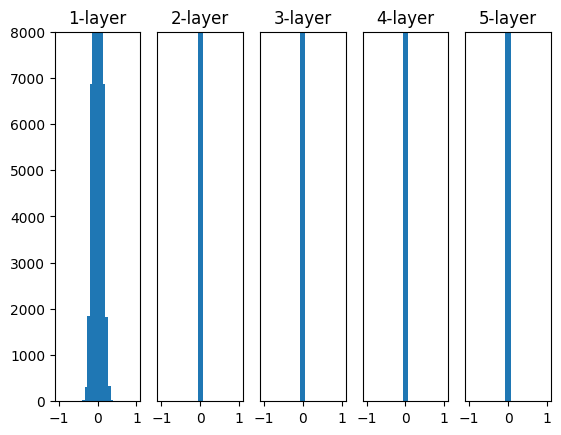

In [ ]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('small')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 8000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

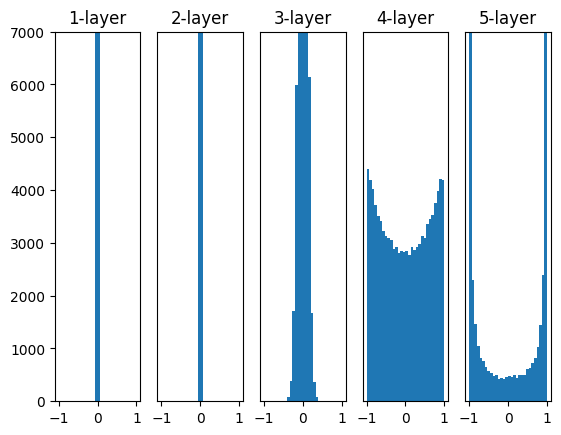

In [ ]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('large')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

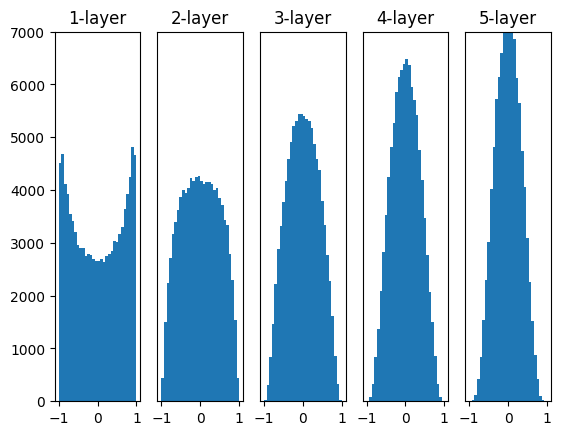

In [ ]:
# Xavier Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

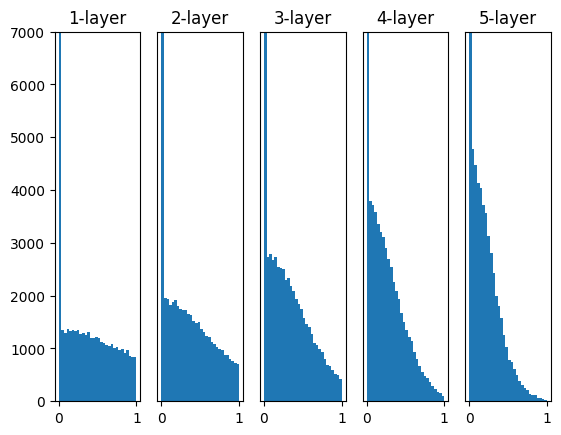

In [ ]:
# He Initialization
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = weight_init('xavier')
    a = np.dot(x, w)

    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
#     plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 3. CNN
*     Reference. https://justkode.kr/deep-learning/pytorch-cnn/

In [ ]:
# Question
# Run two cells below and try to explain the
# change of tensor size after passing through the layers
# e.g.) Conv1: [10, 1, 20, 20] -> [10, 3, 16, 16], because --

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1) # [10, 1, 20, 20] -> [10, 3, 16, 16] 이 된다. 채널은 1 -> 3으로 바뀌고, kernel size=5, stride=1 이므로 (20-5+1)/1 = 16으로 이미지의 크기가 바뀐다.
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1) # [10, 3, 12, 12] -> [10, 10, 12, 12] 이 된다. 채널은 3 -> 10으로 바뀌고, kernel size=5, stride=1 이므로 (16-5+1)/1 = 12으로 이미지의 크기가 바뀐다.
    self.fc1 = nn.Linear(10 * 12 * 12, 50) # [10,10x12x12] -> [10, 50]이 된다. 채널이 1440 -> 50으로 바뀌기 때문이다.
    self.fc2 = nn.Linear(50, 10) # [10,50] -> [10,10]이 된다. 채널이 50 -> 10으로 바뀌기 때문이다.

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.conv1(x))
    print("After conv1", x.size())
    x = F.relu(self.conv2(x))
    print("After conv2",x.size())
    x = x.view(-1, 10 * 12 * 12)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))  # Input Size: (10, 1, 20, 20)

Before torch.Size([10, 1, 20, 20])
After conv1 torch.Size([10, 3, 16, 16])
After conv2 torch.Size([10, 10, 12, 12])
After dimension reduction torch.Size([10, 1440])
After fc1 torch.Size([10, 50])
After fc2 torch.Size([10, 10])


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.max_pool1 = nn.MaxPool2d(kernel_size=2)
    self.max_pool2 = nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(10 * 5 * 5, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    print("Before", x.size())
    x = F.relu(self.max_pool1(x))
    print("After max_pool1", x.size())
    x = F.relu(self.max_pool2(x))
    print("After max_pool2",x.size())
    x = x.view(-1, 10 * 5 * 5)
    print("After dimension reduction", x.size())
    x = F.relu(self.fc1(x))
    print("After fc1", x.size())
    x = self.fc2(x)
    print("After fc2", x.size())
    return x

cnn = CNN()
output = cnn(torch.randn(10, 1, 20, 20))

Before torch.Size([10, 1, 20, 20])
After max_pool1 torch.Size([10, 1, 10, 10])
After max_pool2 torch.Size([10, 1, 5, 5])
After dimension reduction torch.Size([1, 250])
After fc1 torch.Size([1, 50])
After fc2 torch.Size([1, 10])


In [12]:
# Now let's construct a CNN model

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [14]:
train_data = datasets.MNIST('./data/', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)

test_data = datasets.MNIST('./data/', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]))
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=50, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 48275871.12it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1780438.49it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13832308.42it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3815447.38it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [15]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [16]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [17]:
cnn.train()
for epoch in range(10):
  for index, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

loss of 0 epoch, 0 index : 2.270653009414673
loss of 0 epoch, 100 index : 1.0664454698562622
loss of 0 epoch, 200 index : 0.42218658328056335
loss of 0 epoch, 300 index : 0.4504457116127014
loss of 0 epoch, 400 index : 0.14634239673614502
loss of 0 epoch, 500 index : 0.392546147108078
loss of 0 epoch, 600 index : 0.3245229721069336
loss of 0 epoch, 700 index : 0.1571885347366333
loss of 0 epoch, 800 index : 0.15245918929576874
loss of 0 epoch, 900 index : 0.39219069480895996
loss of 0 epoch, 1000 index : 0.12785470485687256
loss of 0 epoch, 1100 index : 0.09152960032224655
loss of 1 epoch, 0 index : 0.13769645988941193
loss of 1 epoch, 100 index : 0.061926502734422684
loss of 1 epoch, 200 index : 0.07695342600345612
loss of 1 epoch, 300 index : 0.07359500229358673
loss of 1 epoch, 400 index : 0.07552750408649445
loss of 1 epoch, 500 index : 0.07130476832389832
loss of 1 epoch, 600 index : 0.21671412885189056
loss of 1 epoch, 700 index : 0.046508755534887314
loss of 1 epoch, 800 index :

In [18]:
# Quick Question
# Write an explanation of the code below (evaluation cell only!)

In [19]:
cnn.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    output = cnn(data)
    test_loss += criterion(output, target).item()
    pred = output.argmax(dim=1, keepdim=True)
    correct += pred.eq(target.view_as(pred)).sum().item()
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Test set: Average loss: 6.5388, Accuracy: 9887/10000 (99%)



In [20]:
# Question (optional)
# Try to adjust the hyperparameters (kernel size, # of conv layers, ...)
# and get better results than the baseline (default) model!!

In [22]:
cnn.eval()#모델 평가 모드로 전환
test_loss = 0#데이터 손실 및 정확도 초기화
correct = 0
with torch.no_grad():#그레디언트 계산 비활성화
  for data, target in test_loader:
    output = cnn(data)#모델에 데이터를 전달하여 예측 생성
    test_loss += criterion(output, target).item()#손실 계산 및 누적
    pred = output.argmax(dim=1, keepdim=True)#예측값 중 가장 큰 확률을 가진 클래스 선택
    correct += pred.eq(target.view_as(pred)).sum().item()# 정확하게 예측된 샘플 수 계산 밎 누적
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



Test set: Average loss: 6.5388, Accuracy: 9887/10000 (99%)



### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment5

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60